# **Importing Libraries**

In [17]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
import pandas, random, numpy
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import PIL
from sklearn.model_selection import train_test_split



In [18]:
civs_path = r'sample_data/cars'
print("path:", civs_path)
paths = glob.glob(civs_path + "/*.jpg") # Grabbing all the image file names
print(paths)

path: sample_data/cars
['sample_data/cars/az_co0_h250_w150_br4_typ0.jpg', 'sample_data/cars/az_co2_h300_w150_br1_typ2.jpg', 'sample_data/cars/az_co0_h300_w200_br2_typ1.jpg', 'sample_data/cars/az_co0_h350_w200_br5_typ4.jpg', 'sample_data/cars/az_co2_h200_w350_br7_typ3.jpg', 'sample_data/cars/az_co2_h240_w180_br8_typ1.jpg', 'sample_data/cars/az_co0_h258_w100_br0_typ0.jpg', 'sample_data/cars/az_co0_h400_w260_br6_typ3.jpg', 'sample_data/cars/az_co5_h300_w350_br4_typ4.jpg', 'sample_data/cars/az_co4_h150_w100_br3_typ4.jpg']


In [19]:
n_images = len(paths)
rand_idxs = np.random.permutation(n_images)
paths_subset = np.random.choice(paths, n_images , replace=False)
all_paths = paths_subset[rand_idxs]
print(n_images)

10


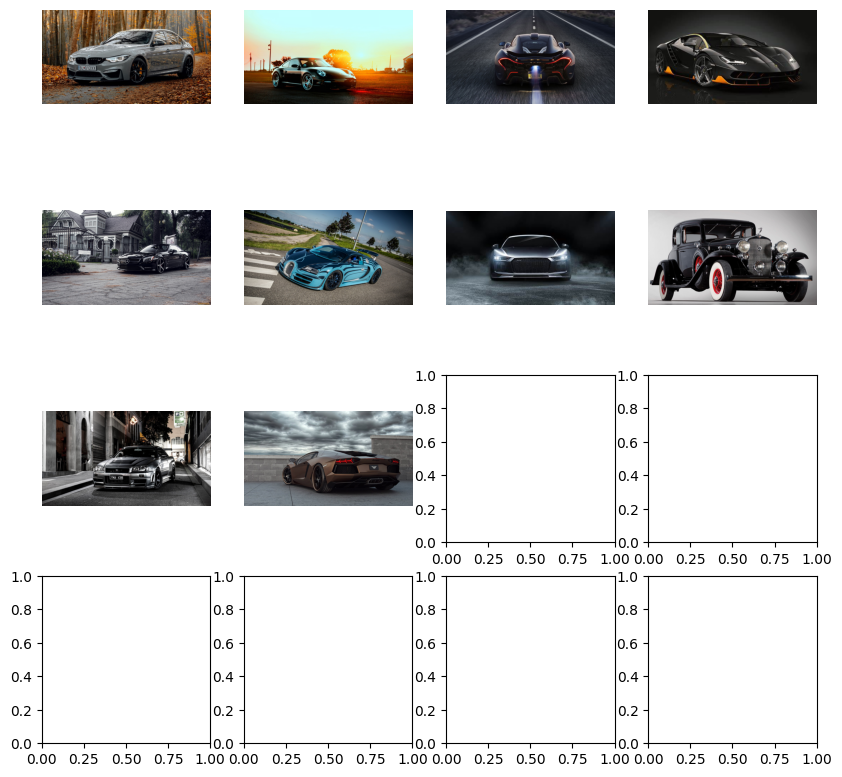

In [20]:
_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

## **Data Annotation**

In [21]:
def label_func2(fname):
    fname = fname.replace('sample_data/cars/', "")
    temp_name = fname.replace(".jpg", "").split("_")

    # Extract attributes from the filename
    # y0: color, y1: height, y2: width, y3: brand, y4: model/type


    # Check if the color attribute is correctly extracted before converting to float
    y0 = temp_name[0]                              ## az
    y1 = float(temp_name[1].replace("co", ""))     ## 'color'
    y2 = float(temp_name[2].replace("h", ""))    ## 'height'
    y3 = float(temp_name[3].replace("w", ""))     ## 'width'
    y4 = float(temp_name[4].replace("br", ""))     ## 'brand'
    y5 = float(temp_name[5].replace("typ", ""))     ## 'type'

    return [fname, y0, y1, y2, y3, y4, y5]

In [22]:
list_imgs = [] # List to store image arrays
list_label_vectors = [] # List to store label vectors

for img_name in all_paths: # Iterate through each image path
    my_img = Image.open(img_name) # Open the image
    my_img = my_img.resize((474,266)) # Resize the image
    my_img = ImageOps.grayscale(my_img) # Convert the image to grayscale
    img_np = np.array(my_img) # Convert the image to a NumPy array
    ## img_np = img_np.reshape(-1)

    temp_label_vector_rc = label_func2(img_name) # Generate a label vector using label_func2
    if temp_label_vector_rc[1] == "az": # Check if the label indicates "az"

        ## print(img_np.shape)
        list_imgs.append(img_np) # Append the image array to list_imgs

        list_label_vectors.append( temp_label_vector_rc ) # Append the label vector to list_label_vectors


In [23]:
X =  list_imgs  # Assigning the list of image arrays to variable X
y =  list_label_vectors  # Assigning the list of label vectors to variable y

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

8
2
8
2


array([[  0,   0,   0, ...,  11,  11,  10],
       [  0,   1,   2, ...,  11,  11,  11],
       [ 10,  11,  16, ...,  11,  11,  11],
       ...,
       [157, 160, 160, ...,  42,  43,  37],
       [160, 161, 160, ...,  37,  34,  36],
       [152, 156, 155, ...,  37,  36,  36]], dtype=uint8)
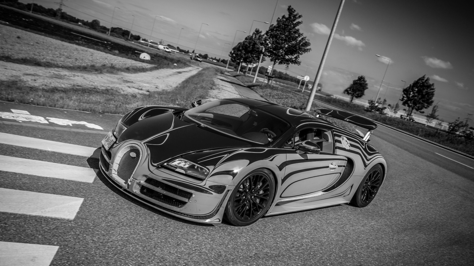

In [25]:
X_train[0]


In [26]:

#Initialize empty lists to store the IDs, features, and images for training data
list_ids_train      = []
list_features_train = []
list_imgs_train     = []

#Loop through each sample in the training data:
for index in range(len(X_train)):

    #Extract the label
    # image target (label)
    reg_vals = y_train[index]
    target = np.zeros( (5) )

    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]
    target[ 4 ] = reg_vals[6]


    # Extract the image data , normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0

    #Append the ID, image, and feature vector to their respective lists

    list_ids_train.append(          reg_vals[0]                )
    list_imgs_train.append(        single_np_img               )
    list_features_train.append(    target      )

array([[  0,   0,   0, ...,  11,  11,  10],
       [  0,   1,   2, ...,  11,  11,  11],
       [ 10,  11,  16, ...,  11,  11,  11],
       ...,
       [157, 160, 160, ...,  42,  43,  37],
       [160, 161, 160, ...,  37,  34,  36],
       [152, 156, 155, ...,  37,  36,  36]], dtype=uint8)
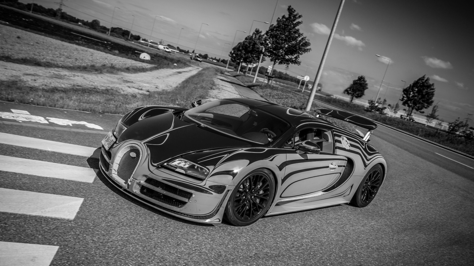

In [27]:
list_imgs_train[0]


In [28]:
list_ids_test      = []
list_features_test = []
list_imgs_test     = []


for index in range(len(X_test)):

    # image target (label)
    reg_vals = y_test[index]
    target = np.zeros( (5) )

    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]
    target[ 4 ] = reg_vals[6]


    # image data, normalised from 0-255 to 0-1
    single_np_img = X_test[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0

    list_ids_test.append(          reg_vals[0]                )
    list_imgs_test.append(        single_np_img               )
    list_features_test.append(    target      )

In [29]:
# Convert the list of feature vectors for training data into a NumPy array
conditions_matrix_train = np.array(list_features_train)

# Convert the list of feature vectors for testing data into a NumPy array
conditions_matrix_test = np.array(list_features_test)


In [30]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(8, 5)
(2, 5)


## **Saving Data For Deployment**

In [31]:
# Convert the NumPy array representing feature matrices into a DataFrame
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")

In [32]:
# Convert the list of IDs for training data into a DataFrame
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")

In [33]:
list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]



In [34]:
list_imgs_train_stretched[0]


array([ 0,  0,  0, ..., 37, 36, 36], dtype=uint8)

In [35]:
list_imgs_train_stretched[4].shape


(126084,)

In [36]:
list_imgs_train_stretched[4][:1000]


array([108, 109, 113, 114, 114, 116, 117, 117, 116, 117, 118, 118, 117,
       119, 119, 120, 121, 123, 125, 125, 124, 123, 124, 125, 125, 126,
       126, 124, 125, 123, 122, 121, 123, 123, 124, 124, 123, 123, 125,
       125, 124, 124, 127, 128, 128, 128, 130, 128, 130, 133, 135, 137,
       138, 139, 140, 142, 143, 145, 147, 148, 148, 148, 145, 145, 145,
       147, 147, 148, 148, 148, 148, 148, 148, 146, 147, 147, 150, 152,
       150, 147, 148, 149, 153, 158, 161, 162, 165, 168, 170, 176, 178,
       181, 182, 188, 193, 193, 198, 202, 204, 210, 215, 219, 219, 222,
       226, 230, 233, 236, 235, 235, 236, 240, 245, 241, 238, 240, 238,
       236, 235, 236, 235, 235, 235, 236, 240, 242, 245, 246, 245, 243,
       242, 240, 237, 233, 230, 227, 224, 220, 217, 215, 207, 199, 196,
       191, 189, 191, 195, 195, 193, 196, 199, 204, 213, 222, 218, 211,
       204, 198, 193, 190, 174, 162, 164, 166, 156, 138, 121, 108,  93,
        87,  86,  88,  91,  99, 101, 104, 114, 124, 126, 128, 12

In [37]:
list_imgs_train_stretched[7].shape


(126084,)

In [38]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )


In [39]:
np_list_imgs_train_stretched.shape


(8, 126084)

In [40]:
np_list_imgs_train_stretched[3]


array([28, 27, 27, ..., 48, 49, 57], dtype=uint8)

In [41]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)


In [42]:
DF_imgs_np_train


,0,1,2,3,4,5,6,7,8,9,...,126074,126075,126076,126077,126078,126079,126080,126081,126082,126083
0,0,0,0,3,8,2,1,2,2,1,...,37,39,41,38,37,36,32,37,36,36
1,90,83,82,95,112,120,140,141,112,118,...,15,52,103,83,18,10,26,42,54,82
2,210,210,210,210,208,207,208,206,206,206,...,99,97,98,98,98,96,95,95,95,94
3,28,27,27,27,28,30,31,33,33,34,...,47,45,45,39,37,45,50,48,49,57
4,108,109,113,114,114,116,117,117,116,117,...,110,106,105,104,98,90,97,112,107,102
5,182,180,152,162,69,73,57,35,38,91,...,93,112,117,90,92,117,102,108,121,108
6,18,18,18,18,18,18,18,18,18,18,...,29,29,29,29,29,29,29,29,31,65
7,44,43,42,39,37,35,33,32,32,31,...,66,68,68,67,71,75,69,60,64,81


In [43]:
DF_imgs_np_train.to_csv("PD_imgs_np_train.csv")
